# Machine Learning - Logistic Regression, Linear Discriminant and Quadratic Discriminant Analysis (Titanic data set)

In [1]:
#Import of packages 
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt #for graphing

In [4]:
import seaborn as sb #for graphing

In [5]:
# Import of Scikit-Learn 
import sklearn

In [6]:
from sklearn import preprocessing

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn import metrics

In [10]:
from sklearn.metrics import classification_report

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
%matplotlib inline

## Read-in data, analyse data

In [13]:
train = pd.read_csv('Titanicdata.csv')

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Rows and columns
train.shape

(891, 12)

In [16]:
# Descriptive statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
train.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
# Find out how many missing values are there
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Pre-processing

Survived is y-variable

In [19]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
train.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [21]:
train.Pclass = train.Pclass.apply(str)

In [22]:
train.dtypes

Survived      int64
Pclass       object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [23]:
train = pd.get_dummies(train, prefix_sep='_', drop_first=True, dtype=float)

In [24]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0.0,1.0,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,0.0,0.0,1.0
4,0,35.0,0,0,8.0500,0.0,1.0,1.0,0.0,1.0


In [75]:
train.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Pclass_2      float64
Pclass_3      float64
Sex_male      float64
Embarked_Q    float64
Embarked_S    float64
dtype: object

In [25]:
train.isnull().sum()

Survived        0
Age           177
SibSp           0
Parch           0
Fare            0
Pclass_2        0
Pclass_3        0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [26]:
train.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Pclass_2      float64
Pclass_3      float64
Sex_male      float64
Embarked_Q    float64
Embarked_S    float64
dtype: object

In [27]:
train.corr()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.077221,-0.035322,0.081629,0.257307,0.093349,-0.322308,-0.543351,0.003650,-0.155660
Age,-0.077221,1.000000,-0.308247,-0.189119,0.096067,0.006954,-0.312271,0.093254,-0.022405,-0.032523
SibSp,-0.035322,-0.308247,1.000000,0.414838,0.159651,-0.055932,0.092548,-0.114631,-0.026354,0.070941
Parch,0.081629,-0.189119,0.414838,1.000000,0.216225,-0.000734,0.015790,-0.245489,-0.081228,0.063036
Fare,0.257307,0.096067,0.159651,0.216225,1.000000,-0.118557,-0.413333,-0.182333,-0.117216,-0.166603
Pclass_2,0.093349,0.006954,-0.055932,-0.000734,-0.118557,1.000000,-0.565210,-0.064746,-0.127301,0.192061
Pclass_3,-0.322308,-0.312271,0.092548,0.015790,-0.413333,-0.565210,1.000000,0.137143,0.237449,-0.009511
Sex_male,-0.543351,0.093254,-0.114631,-0.245489,-0.182333,-0.064746,0.137143,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,-0.022405,-0.026354,-0.081228,-0.117216,-0.127301,0.237449,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,-0.032523,0.070941,0.063036,-0.166603,0.192061,-0.009511,0.125722,-0.496624,1.000000


<Axes: >

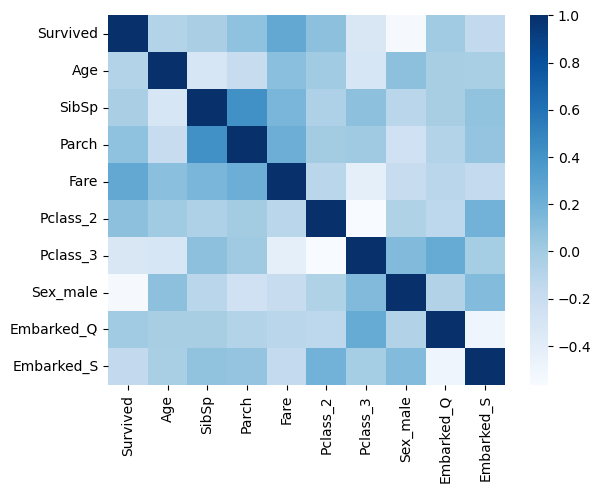

In [28]:
sb.heatmap(train.corr(), cmap='Blues') 

## Logistic Regression

In [29]:

X = train
X = train.dropna() 

In [30]:
X.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [31]:
# assigning y variable
Y = X['Survived']

In [32]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
# drop survive column
X.pop('Survived')
X.columns 

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [34]:
X.shape 

(714, 9)

In [35]:
# spliting the data into x, y train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .25, random_state=25)

In [36]:
Y_train.shape 

(535,)

In [37]:
Y_test.shape

(179,)

In [38]:
X_train.shape 

(535, 9)

In [39]:
X_test.shape

(179, 9)

In [40]:
# Model of Logistic Regression

logit = LogisticRegression()

#logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
#verbose=0, warm_start=False)

In [41]:
# Fit the model to the training data
logit.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions

In [42]:
Y_pred = logit.predict(X_test)

In [43]:
Y_pred 

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1])

In [44]:
Y_pred.shape 

(179,)

In [45]:
Y_test.head(20) # true y's from test data sample

501    0
315    1
679    1
866    1
119    0
254    0
885    0
155    0
169    0
683    0
515    0
192    1
724    1
393    1
523    1
467    0
659    0
663    0
777    1
805    0
Name: Survived, dtype: int64

## For model evaluation: compare Y_test with Y_pred !

In [46]:
logit.predict_proba(X_test)


array([[0.31367452, 0.68632548],
       [0.4429512 , 0.5570488 ],
       [0.17533375, 0.82466625],
       [0.21640559, 0.78359441],
       [0.55513694, 0.44486306],
       [0.51385591, 0.48614409],
       [0.33272798, 0.66727202],
       [0.53649351, 0.46350649],
       [0.87231774, 0.12768226],
       [0.95955646, 0.04044354],
       [0.6174468 , 0.3825532 ],
       [0.47782908, 0.52217092],
       [0.53382526, 0.46617474],
       [0.06462682, 0.93537318],
       [0.09186962, 0.90813038],
       [0.68962579, 0.31037421],
       [0.53762058, 0.46237942],
       [0.91035414, 0.08964586],
       [0.28068025, 0.71931975],
       [0.89572882, 0.10427118],
       [0.17555751, 0.82444249],
       [0.06947486, 0.93052514],
       [0.68634049, 0.31365951],
       [0.13396454, 0.86603546],
       [0.12911983, 0.87088017],
       [0.28436146, 0.71563854],
       [0.15327455, 0.84672545],
       [0.93801186, 0.06198814],
       [0.89877068, 0.10122932],
       [0.16612065, 0.83387935],
       [0.

## Model Metrics

In [47]:
Y_test.value_counts()

Survived
0    103
1     76
Name: count, dtype: int64

Survived
0    103
1     76
Name: count, dtype: int64

In [48]:
Y_pred.shape

(179,)

In [49]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred) # Confusion Matrix 
print(confusion_matrix)

[[86 17]
 [21 55]]


In [50]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       103
           1       0.76      0.72      0.74        76

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [51]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.7877094972067039


### Plotting the ROC:

In [52]:
prob = logit.predict_proba(X_test)

In [53]:

pred = prob[:,1]

In [54]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, pred)

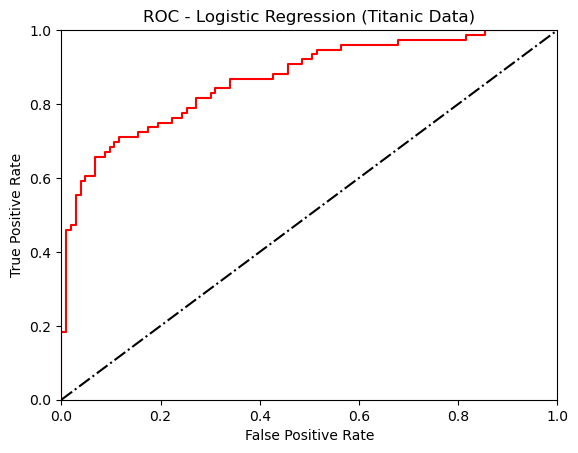

In [55]:
plt.title('ROC - Logistic Regression (Titanic Data)')
plt.plot(fpr, tpr, 'r')
plt.plot([0, 1], [0, 1],'k-.')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [56]:
metrics.roc_auc_score(Y_test, pred)

0.8673990802248338

# Linear Discriminant Analysis

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [58]:
lda = LinearDiscriminantAnalysis()

In [59]:
lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [60]:
Y_pred = lda.predict(X_test)

In [61]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1])

In [62]:
Y_pred.shape

(179,)

In [63]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred) # Confusion Matrix aufstellen
print(confusion_matrix)


[[82 21]
 [20 56]]


In [64]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       103
           1       0.73      0.74      0.73        76

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179



In [65]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.770949720670391


# Quadratic Discriminant Analysis

In [66]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [67]:
qda = QuadraticDiscriminantAnalysis()

In [68]:
qda.fit(X_train, Y_train)

QuadraticDiscriminantAnalysis()

In [69]:
Y_pred = qda.predict(X_test)

In [70]:
Y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1])

In [71]:
Y_pred.shape

(179,)

In [72]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred) # Confusion Matrix aufstellen
print(confusion_matrix)


[[83 20]
 [24 52]]


In [73]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       103
           1       0.72      0.68      0.70        76

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.75      0.75      0.75       179



In [74]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.7541899441340782
